In [7]:
import pandas as pd
data = pd.read_csv('C:/Users/adbir/Data Science/Football score prediction/results.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41640 entries, 0 to 41639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        41640 non-null  object
 1   home_team   41640 non-null  object
 2   away_team   41640 non-null  object
 3   home_score  41640 non-null  int64 
 4   away_score  41640 non-null  int64 
 5   tournament  41640 non-null  object
 6   city        41640 non-null  object
 7   country     41640 non-null  object
 8   neutral     41640 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [2]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
data.describe()

,home_score,away_score
count,41640.000000,41640.000000
mean,1.744813,1.187680
std,1.753365,1.404828
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [6]:
import numpy as np
data.loc[[np.argmax(data.total_goals)]]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_goals
23796,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,31


([<matplotlib.axis.XTick at 0x232fb4f7430>,
 <a list of 18 Text major ticklabel objects>)

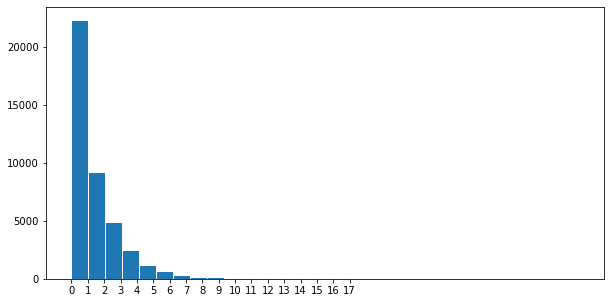

In [2]:
# most_probable home score
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
plt.hist(data.home_score,bins=30,edgecolor='white')
plt.xticks(range(18))

In [ ]:
#data.drop('Total_goals',axis=1,inplace=True)

([<matplotlib.axis.XTick at 0x16ed597ed60>,
 <a list of 20 Text major ticklabel objects>)

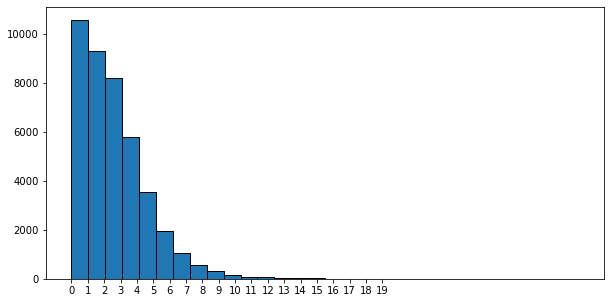

In [8]:
#most probable total goals in a match
import matplotlib.pyplot as plt
data['total_goals']=data['home_score']+data['away_score']
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
plt.hist(data.total_goals,bins=30,edgecolor='black')
plt.xticks(range(20))

In [9]:
data['date']=data['date'].apply(lambda x : int(str.split(x,'-')[0]))
data['date'].value_counts()
data['date'].min()

1872

([<matplotlib.axis.XTick at 0x2132787f8b0>,
 <a list of 20 Text major ticklabel objects>)

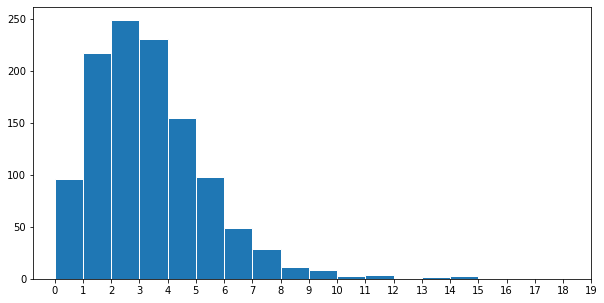

In [44]:
# most probable total goals in 2019
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
plt.hist(data[data['date']==2019].total_goals,bins=15,
         edgecolor='white')
plt.xticks(range(20))
#ax.xaxis.set_major_formatter(plt.NullFormatter())
#ax.axes.get_xaxis().set_visible(False)
#ax.axes.get_yaxis().set_visible(False)

In [90]:
data.iloc[[data.total_goals.argmax()]]
print(data.total_goals.mean())

2.932492795389049


In [10]:
# Poisson probability is: P(x; μ) = (e-μ) (μx) / x!
#lam =2.93
from scipy.special import factorial
import numpy as np
#k is no. of event we want to find the probability of

def poisson(k,exp_events):
    #minutes=90
    lam =(exp_events)
    p_k= np.exp(-lam)*np.power(lam,k)/factorial(k)
    #print(f'The probability of {k} goals in {minutes} minutes is {100*p_k:.2f})%.')
    return p_k

In [7]:
#proability of goals acc to poisson distribution
k=[]
p_k=[]
for i in range(10):
    p_k.append(poisson(i,2.93,90))
    k.append(i)

The probability of 0 goals in 90 minutes is 5.67)%.
The probability of 1 goals in 90 minutes is 16.27)%.
The probability of 2 goals in 90 minutes is 23.35)%.
The probability of 3 goals in 90 minutes is 22.34)%.
The probability of 4 goals in 90 minutes is 16.03)%.
The probability of 5 goals in 90 minutes is 9.20)%.
The probability of 6 goals in 90 minutes is 4.40)%.
The probability of 7 goals in 90 minutes is 1.80)%.
The probability of 8 goals in 90 minutes is 0.65)%.
The probability of 9 goals in 90 minutes is 0.21)%.


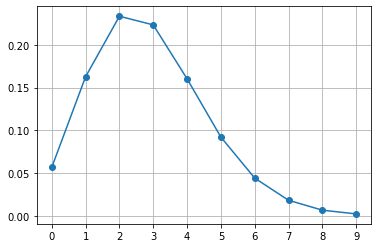

In [8]:
plt.plot(k,p_k,'-o')
plt.xticks(range(10))
plt.grid(True)

                  0
count  10000.000000
mean       2.879600
std        1.704932
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       11.000000


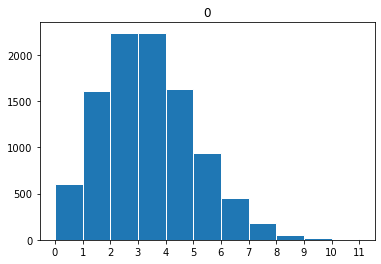

In [121]:
# In 10000 matches simulation goals scored distribution
N=10000
lam=2.87
counts=np.random.poisson(lam,size=N)
df=pd.DataFrame(counts)
print (df.describe())
#print(df[0].value_counts())
df.hist(bins=11,edgecolor='white')
plt.xticks(range(12))
plt.grid(False)

In [19]:
#p_n = poisson(np.arange(100),5)

In [34]:
def p_lessorequal(n_query,exp_events,quiet=True):
    p_n=poisson(np.arange(100),exp_events)
    p=p_n[:n_query+1].sum()
    if quiet:
        return p
    else:
        print(f'{exp_events} goals per game.Probability of {n_query} or fewer goals in 1 game: {100*p:.2f}%.')
    
def p_greaterorequal(n_query,exp_events,quiet=True):
    p = 1 - p_lessorequal(n_query,exp_events)
    if quiet:
        return p
    else:
        print(f'{exp_events} goals per game.Probability of more than {n_query} goals in 1 game: {100*p:.2f}%.')
        


In [36]:
#probability of scoring more or fewer goals than a particular no.
p_lessorequal(4,2.87,False)
p_greaterorequal(4,2.87,False)

2.87 goals per game.Probability of 4 or fewer goals in 1 game: 83.66%.
2.87 goals per game.Probability of more than 4 goals in 1 game: 16.34%.


# If we switch on to tv at a  random time, then the average time we have to wait to see a goal

In [45]:
events_per_min=(2.87/90)
np.random.seed(42)
events = np.random.choice([0,1],size=100000,
                          replace=True,
                          p=[1-events_per_min,events_per_min])
success_times = np.where(events==1)[0]
waiting_times = np.diff(success_times)
waiting_times[:10]

array([39, 19, 70, 15, 72, 35, 44, 85, 51,  5], dtype=int64)

In [63]:
def plot_hist_waiting_time(x):
    df = pd.DataFrame(x)
    df.hist(bins=100)

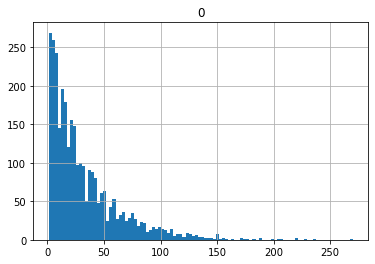

In [65]:
plot_hist_waiting_time(waiting_times)

In [67]:
#Simulating avg time for 10000 matches to get the actual average time
avg = []
events_per_minute=(2.87/90)
for i in range(10000):
    avg.append(np.mean(np.diff(np.where(np.random.choice([0, 1], size = 100000, replace=True, 
                          p=[1-events_per_minute, events_per_minute]) == 1)[0])))

                  0
count  10000.000000
mean      31.367507
std        0.544495
min       29.479351
25%       30.996199
50%       31.359485
75%       31.729481
max       33.608608


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000232FF32F850>]],
      dtype=object)

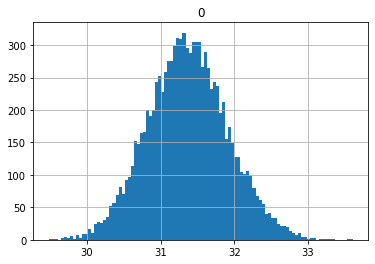

In [71]:
df= pd.DataFrame(avg)
print(df.describe())
df.hist(bins=100)


# predicting scores by poisson

In [12]:
len(data[(data.home_team =='England') & (data.away_team =='France')])

13

In [13]:
data['home_team'] = data['home_team'].apply(lambda x: (''.join(x.split())).lower())
data['away_team'] = data['away_team'].apply(lambda x: (''.join(x.split())).lower())

In [37]:
import numpy as np
from scipy import stats
counts = np.random.poisson(2.87,10)
print(int(stats.mode(counts)[0]))

2


In [88]:
import pandas as pd
import numpy as np
from scipy import stats 

def PredictScore():
    
    home_team = input("Enter Home Team: ")
    ht = (''.join(home_team.split())).lower()
    away_team = input("Enter Away Team: ")
    at = (''.join(away_team.split())).lower()
    
    if len(data[(data.home_team ==ht) & (data.away_team ==at)]) > 20:
        
        avg_home_score = data[(data.home_team ==ht) & (data.away_team ==at)].home_score.mean()
        avg_away_score = data[(data.home_team ==ht) & (data.away_team ==at)].away_score.mean()
        
        home_goal = int(stats.mode(np.random.poisson(avg_home_score,100000))[0])                    
        away_goal = int(stats.mode(np.random.poisson(avg_away_score,100000))[0])
        
    else:
        avg_home_goal_conceded = data[(data.home_team ==ht)].away_score.mean()
        avg_away_goal_scored   = data[(data.away_team ==at)].away_score.mean()
        away_goal = int(stats.mode(np.random.poisson(1/2*(avg_home_goal_conceded+avg_away_goal_scored),100000))[0])
        
        avg_away_goal_conceded = data[(data.home_team ==at)].home_score.mean()
        avg_home_goal_scored   = data[(data.away_team ==ht)].home_score.mean()
        home_goal = int(stats.mode(np.random.poisson(1/2*(avg_away_goal_conceded+avg_home_goal_scored),100000))[0])
    
    avg_total_score = int(stats.mode(
        np.random.poisson((data[(data.home_team ==ht) & (data.away_team ==at)].total_goals.mean()),100000))[0])
    
    print(f'Expected total goals are {avg_total_score}')
    print(f'They have played {len(data[(data.home_team ==ht) & (data.away_team ==at)])} matches')
    print(f'The scoreline is {home_team} {home_goal}:{away_goal} {away_team}')

In [89]:
PredictScore()

Enter Home Team: Italy
Enter Away Team: mexico
Expected total goals are 3
They have played 6 matches
The scoreline is Italy 1:1 mexico


In [91]:
#Search in google: "last match between {home_team vs {away_team}}"